# Statistik und Plots

In Ihren Laboren und Abschlussarbeiten werden Sie oft mit tabularen Daten arbeiten. In diesem Notebook werden wir uns mit der Analyse und Visualisierung von Daten beschäftigen. Wir werden die Bibliotheken `pandas` und `seaborn` verwenden, um Daten zu analysieren und zu visualisieren.

In diesem Notebook werden Sie eine vielzahl von speziellen Funktionen kennenlernen, die Ihnen helfen, Daten zu analysieren und zu visualisieren. Vielleicht werden Sie sich fragen, wie sie sich diese Funktionen alle merken sollen. Das ist gar nicht nötig. Sie können sich immer an die Dokumentation der Bibliotheken oder KI-Unterstützung wenden, um die Funktionen zu finden, die Sie benötigen. Dafür brauchen Sie aber eine Vorstellung davon, was möglich ist. Das ist der Zweck dieses Notebooks.

## Pandas und Dataframes

Tabulare Daten begegnen uns in vielen Bereichen. Sie können in Form von Excel-Tabellen, CSV-Dateien oder Datenbanken vorliegen. CSV-Dateien können z.B. aussehen, wie das folgende [Beispiel](docs\data\palmerpenguins_extended.csv)

```csv
species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
```


### Einlesen von Tabellen

Tabulare Daten können wir am besten mit einem [pandas-Dataframe](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html) verarbeiten. Ein Dataframe ist eine zweidimensionale Datenstruktur, die Daten in Zeilen und Spalten organisiert. Wir können Daten aus verschiedenen Quellen wie CSV-Dateien, Excel-Tabellen oder Datenbanken in ein Pandas-Dataframe einlesen. 

In [1]:
# Da wird pandas öfter verwendet, deshalb importieren wir es hier mit einer Abkürzung pd
import pandas as pd

!wget https://github.com/jhumci/2024_SoSe_BioInformatik/blob/main/docs/data/palmerpenguins_extended.csv

# Hier lesen wir die Daten ein
df = pd.read_csv('palmerpenguins_extended.csv')

# Hier schauen wir uns die ersten 5 Zeilen an
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


Das `shape` Attribut gibt uns die Anzahl der Zeilen und Spalten zurück. In diesem Fall haben wir 344 Zeilen und 17 Spalten.

In [2]:
df.shape

(3430, 11)

Wenn wir uns für einzelne Spalten interessieren, können wir diese mit dem Namen der Spalte auswählen. Wie beim Index von Listen oder Schlüssel von Dictionaries, können wir auf die Spalten eines Dataframes mit eckigen Klammern zugreifen. In diesem Fall wählen wir die Spalte `body_mass_g` aus.

In [3]:
df["body_mass_g"]

0       5687.0
1       6811.0
2       5388.0
3       6262.0
4       4811.0
         ...  
3425    6447.0
3426    6872.0
3427    7409.0
3428    6491.0
3429    6835.0
Name: body_mass_g, Length: 3430, dtype: float64

Mehre Spalten können wir auswählen, indem wir eine Liste von Spaltennamen in die eckigen Klammern schreiben. In diesem Fall wählen wir die Spalten `species`, `island` und `body_mass_g` aus.

In [4]:
df[["body_mass_g", "species","island"]]

,body_mass_g,species,island
0,5687.0,Adelie,Biscoe
1,6811.0,Adelie,Biscoe
2,5388.0,Adelie,Biscoe
3,6262.0,Adelie,Biscoe
4,4811.0,Adelie,Biscoe
...,...,...,...
3425,6447.0,Gentoo,Biscoe
3426,6872.0,Gentoo,Biscoe
3427,7409.0,Gentoo,Biscoe
3428,6491.0,Gentoo,Biscoe


Zeilen können Sie über den Index auswählen. Der Index die sie Spalte, die jeder Zeile einen Namen gibt. In unserem Fall sind dies sie Zahlen von 0 bis 3430. Wir können auch Zeilen über den Index auswählen, indem wir die Methode `loc` verwenden, wie wie der Zugriff auf den Index in Listen funktioniert. In diesem Fall wählen wir die Zeilen 0 bis 3 aus.

In [5]:
df.loc[0:3]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021


##### ✍️ Aufgabe: Finden Sie den schwersten Pinguin

![](images/image.png)

Hierzu müssen Sie zunächst die Spalte `body_mass_g` auswählen und dann die Methode `sort_values(<column_name>)` verwenden, der Sie den Namen der Spalte übergeben nach der Sie sortieren möchten. Die Methode `sort_values` gibt ein neues Dataframe zurück, das die sortierten Werte enthält. Sie können dann die Methoden `head()` und `tail()` verwenden, um die ersten und letzten Zeilen des Dataframes zu erhalten. 

What is his/her favorite food?

In [6]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.sort_values('body_mass_g').tail(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
1561,Gentoo,Biscoe,67.4,20.8,244.0,10549.0,male,fish,adult,overweight,2023


In [7]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.sort_values('body_mass_g').tail(1)["diet"]

1561    fish
Name: diet, dtype: object

#### Filtern

Häufig wollen wir nicht den ganzen Datenbestand sehen, sondern nur bestimmte Einträge, die verschiedene Bedingungen erfüllen. Hierzu können wir die Methode `query` verwenden. Die Methode `query` nimmt einen String als Argument, der die Bedingungen enthält, die die Einträge erfüllen müssen. 

Wenn wir nun eine Liste vor uns hätten könnten wir uns mit einem einfachen `for`-Loop und einer überprüfung der Bedingung die weiblichen Pinguine ausgeben lassen. 

Das Paket `pandas` bietet uns hierfür verschiedene Methoden an. Eine davon ist die Methode `query`. Diese Methode nimmt einen String als Argument, der die Bedingungen enthält, die die Einträge erfüllen müssen.

In diesem Fall wählen wir die Einträge aus, bei denen die Spalte `body_mass_g` größer als 6000 ist.


In [8]:
df.query('body_mass_g > 6000')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
7,Adelie,Biscoe,66.1,20.8,246.0,6653.0,male,fish,adult,overweight,2021
8,Adelie,Biscoe,61.4,19.9,270.0,6722.0,male,fish,adult,overweight,2021
9,Adelie,Biscoe,54.9,22.3,230.0,6494.0,male,fish,adult,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


Hierbei können wir auch eine Logisches und oder oder verwenden:

In [9]:
df.query('body_mass_g > 6000 and diet == "squid"')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
105,Adelie,Dream,43.6,18.6,208.0,6896.0,male,squid,adult,overweight,2021
106,Adelie,Dream,42.1,20.2,240.0,6157.0,male,squid,adult,overweight,2021
107,Adelie,Dream,37.7,23.8,214.0,6280.0,male,squid,adult,overweight,2021
225,Chinstrap,Dream,53.4,23.4,221.0,7663.0,male,squid,adult,overweight,2021
351,Gentoo,Biscoe,46.8,24.8,248.0,7400.0,male,squid,adult,overweight,2021
353,Gentoo,Biscoe,51.0,18.8,237.0,6788.0,male,squid,adult,healthy,2021
354,Gentoo,Biscoe,51.6,22.9,248.0,6283.0,male,squid,adult,healthy,2021
355,Gentoo,Biscoe,45.6,21.9,256.0,6805.0,male,squid,adult,healthy,2021
462,Adelie,Biscoe,39.2,17.3,249.0,6175.0,male,squid,adult,overweight,2022
648,Adelie,Torgensen,43.6,16.7,217.0,6090.0,male,squid,adult,overweight,2022


##### ✍️ Aufgabe: Finden Sie den schwersten weiblichen Pinguin 

Diese soll sich noch in der Lebensstufe `"juvenile"` befinden.

In [10]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.query('sex == "female" and life_stage == "juvenile"').sort_values('body_mass_g').tail(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
2335,Gentoo,Biscoe,52.4,18.2,198.0,7231.0,female,fish,juvenile,overweight,2024


### Statistische Funktionen

Wir können So sehr schnell [statistische Funktionen](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html) auf die Daten anwenden. Mit der `describe` Funktion erhalten wir eine Zusammenfassung der statistischen Kennzahlen für die numerischen Spalten.

Die umfassendste Funktion is `describe()`. Diese Funktion gibt uns eine Zusammenfassung der statistischen Kennzahlen für die numerischen Spalten.

In [11]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3430.000000,3430.000000,3430.000000,3430.000000,3430.000000
mean,38.529825,18.447143,207.028863,4834.710496,2023.348397
std,13.175171,2.774428,28.944765,1311.091310,1.313797
min,13.600000,9.100000,140.000000,2477.000000,2021.000000
25%,28.900000,16.600000,185.000000,3843.500000,2022.000000
50%,34.500000,18.400000,203.000000,4633.500000,2024.000000
75%,46.600000,20.300000,226.000000,5622.000000,2024.000000
max,88.200000,27.900000,308.000000,10549.000000,2025.000000


Natürlich können wir auch einzelne statistische Kennzahlen berechnen. Hierzu können wir die Methoden `mean`, `median`, `min`, `max`, `std` und `var` verwenden.

Beispielweise die das Durchschnittsgewicht der Pinguine, die sich von Fisch ernähren.

In [12]:
df.query('diet == "fish"')["body_mass_g"].mean()

6173.379958246346

### Gruppieren von Daten

Nun stellt sich natürlich die Frage, ob sich die Ernährungsgewohnheiten der Pinguine auf das Gewicht auswirken. Hierzu können wir die Daten gruppieren und dann statistische Kennzahlen berechnen. Wieder käme ein `for`-Loop in Frage, aber auch hier bietet uns `pandas` eine elegantere Lösung an. Dieser Befehl lautet `groupby`:

In [13]:
df.groupby('diet')["body_mass_g"].mean()

diet
fish        6173.379958
krill       4627.906977
parental    3530.867442
squid       5520.274611
Name: body_mass_g, dtype: float64

Unklar ist jedoch in wie weit sich das Gewicht nur durch die Ernährungsgewohnheiten erklären lässt oder ob hier auch das Geschlecht eine Rolle spielt.



##### ✍️ Aufgabe: Berechnen Sie das Durchschnittsgewicht der Pinguine der Spezies `"Adelie"` und gruppiert nach Geschlecht und Ernährungsgewohnheiten.

Wenn Sie doppelt gruppieren wollen, können Sie eine Liste von Spaltennamen an die Methode `groupby(["diet","sex"])` übergeben

In [14]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

df.query("species == 'Adelie'").groupby(["diet","sex"])["body_mass_g"].mean()

diet      sex   
fish      female    5189.405660
          male      6184.761628
krill     female    3987.316265
          male      4785.395894
parental  female    3008.362319
          male      3601.914692
squid     female    4606.692308
          male      5500.086957
Name: body_mass_g, dtype: float64

## Plots mit `seaborn`

Nun wollen wir die Daten visualisieren. Hierzu können wir die Bibliothek `seaborn` verwenden. `seaborn` ist eine Bibliothek, die auf `matplotlib` aufbaut und eine einfachere und schönere API bietet.

Soweit haben wir ausgewertet, wie Geschlecht und Ernährungsgewohnheiten das Gewicht beeinflussen. Können Sie auf einen Blick erkennen, wie sich das Gewicht der Pinguine in den verschiedenen Gruppen unterscheidet?

Damit dies leichter fällt, möchten wir die Daten visualisieren. Zunächst müssen wir uns Gedanken machen, welche Art von Plot wir verwenden wollen. Hierfür bietet `seaborn` eine Vielzahl von [Plots](https://seaborn.pydata.org/tutorial/function_overview.html) an. In diesem Fall wollen wir die Methode `barplot` verwenden, die uns die Mittelwerte der Gruppen anzeigt. In der [Example-Galerie](https://seaborn.pydata.org/examples/index.html) von `seaborn` finden Sie viele Beispiele, wie Sie die Daten visualisieren können. Zum Beispiel können Sie sich die [Beispiele für barplots](https://seaborn.pydata.org/examples/grouped_barplot.html) ansehen

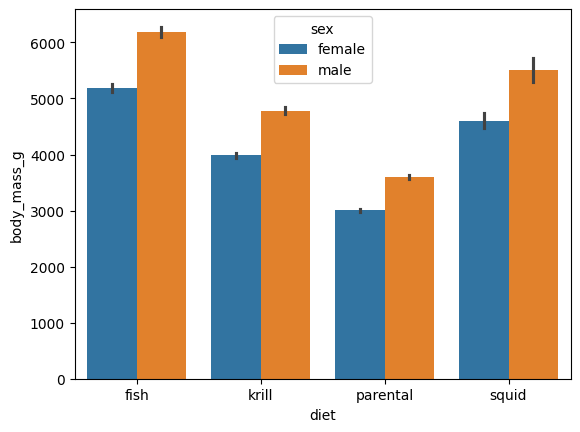

In [15]:
# Importiere die notwendigen Bibliotheken
import seaborn as sns
import matplotlib.pyplot as plt

# Erstelle eine Leinwand
plt.figure()

# Filtere die Daten nach der Art Adelie
df_plot = df.query('species == "Adelie"')

# Erstelle ein Balkendiagramm
fig = sns.barplot(data=df_plot, x="diet", y="body_mass_g", hue ="sex")

# Zeige das Diagramm an
plt.show()

Der Plot wird zurückgegeben und und in der variablen `fig` gespeichert. Wir können ihn mit der Methode `show` anzeigen.
Als Daten erwartet der Plot einen Dataframe und die Namen der Spalten, die auf der x- und y-Achse dargestellt werden sollen. Über `hue` (Farbton) können wir die Daten noch weiter gruppieren.

Der Plot hilft weiter, aber noch wäre er nicht perfekt, um alle Punkte in einem Laborbericht zu bekommen. Hierfür können wir diverse `set`-Methoden verwenden, um die Achsenbeschriftungen zu ändern und den Plot zu verschönern.

In [16]:
# set the title
fig.set_title("Adelie Penguins")

# set the x-axis label
fig.set_xlabel("Diet")

# set the y-axis label
fig.set_ylabel("Body Mass in g")

# store the plot

fig.figure.savefig("Adelie_penguins.png")

## 🤖 Umgang mit KI-Unterstützung

### Promts für ChatGPT

Überlegen sie sich immer genau, das die KI wissen muss, um Ihnen möglichst gut helfen zu können (z.B. die Struktur Ihrer Daten). Innerhalb einer Chat-Session merkt sich die KI, was sie zuvor gesagt haben. Sie können also in einer Chat-Session aufeinander aufbauende Fragen stellen.

**gut**

Sinnvoll ist es dabei der KI möglichst genau zu sagen, was Sie an Informationen haben und was Sie erreichen wollen.

```
I have a csv file palmerpenguins_extended.csv that contains data about penguins. And looks like this:

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021


How can I Read this into a Pandas Dataframe? And how can I filter the data only for the island ``Biscoe`` and get the maximum body mass of the penguins grouped by species and sex?
```

**schlecht**

Weniger geeignet sind unkopkrete Fragen, die der KI nicht genug Informationen geben, um Ihnen zu helfen. In diesem Fall könnten Sie die Frage genau so gut bei Google eingeben und so Beispiele für die Verwendung von `pandas` finden.

```	
How to read a csv file into a pandas DataFrame and get the mean of a value?
```

### Unterstützung durch Autocomplete

Einige Programme, wie [GitHub Copilot](https://github.com/features/copilot) unterstützen sogar direkt beim Schreiben von Code, indem Sie Ihnen Vorschläge machen, wie Sie den Code vervollständigen können. Nutzen Sie Kommentare, um die KI zu unterstützen. Sie können Kommentare verwenden, um der KI zu sagen, was Sie als nächstes tun möchten. Nutzen Sie nicht immer direkt den ersten Vorschlag, sondern überlegen Sie, ob der Vorschlag zu Ihrem Problem passt und lassen Sie sich auch Alternativen anzeigen.

## 🏆 Projekt


Im Paper [Reshetnikov, Evgeny, et al. "Dataset of allele and genotype frequencies of five polymorphisms candidate genes analyzed for association with body mass index in Russian women." Data in brief 28 (2020): 104962.](https://www.sciencedirect.com/science/article/pii/S2352340919313174#bib1) wurden Daten von Gewicht und Körpergröße von Frauen in Russland untersucht. Daneben sind auch genetische Daten (Allelfrequenzen) von fünf Polymorphismen in Kandidatengenen für die Assoziation mit dem Body-Mass-Index (BMI) enthalten. Jedes Gen wird durch eine Spalte repräsentiert, die den Single Nucleotide Polymorphism mit seiner Bezeichnung enthält. Die Werte in den Spalten sind die Allele, die in den Probanden gefunden wurden.

1. Lesen Sie die Daten ([`genes_body_weight.csv`](https://github.com/jhumci/2024_SoSe_BioInformatik/blob/main/docs/data/genes_body_weight.csv)) in ein Pandas-Dataframe ein. (10%)
2. Beschreiben Sie das Sample, indem Sie die statistischen Kennzahlen berechnen damit ein Leser sich einen Eindruck über die Daten machen kann. (20%)
    - Wie groß ist das Sample?
    - Welche Variablen sind enthalten?
    - Wie sind die Verteilungen der Variablen (Mittelwert, Minimum, Maximum)?
    - Visualisieren Sie die Verteilungen aller numerischen Variablen in einer [Scatter-Matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html).
3. Visualisieren Sie den Zusammenhang zwischen Gewicht und Körpergröße in einem [Scatter-Plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) und färben Sie die Punkte nach dem BMI ein. (10%)
4. Beantworten Sie für jedes der Gene: (10%)
    - Wie viele Allele gibt es in Datensatz?
    - Was ist die Häufigkeit der jeweiligen Allele?
    - Nutzen Sie `print()`-Statements, um die Ergebnisse anzuzeigen.
5. Erstellen Sie für jedes Gen einen [Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html), der den BMI nach Genotypen zeigt. Sehen Sie Auffälligkeiten? Sie können einen `for`-Loop verwenden, um die Boxplots für jedes Gen zu erstellen indem sie über der Spaltenamen iterieren. (10%)
6. Beschränken Sie sich auf ([Übergewicht und höher](https://de.wikipedia.org/wiki/Body-Mass-Index)) und wiederholen Sie die Visualisierung von Schritt 5. (10%)
7. Recherchieren Sie, ob die Literatur ihre Ergebnisse stützt und schreiben Sie einen kurzen Abschnitt über die Bedeutung der Ergebnisse (mit Quellenangaben). (10%)


Bewertungsgrundlage: Die Punkte 1-6 werden anhand der Vollständigkeit und Richtigkeit der Ergebnisse bewertet. Der Punkt 7 wird anhand der Qualität der Recherche und der Verständlichkeit des Textes bewertet. Zudem werden 20% der Punkte für die Qualität des Codes vergeben (Lesbarkeit, Kommentare, Verwendung von Funktionen, etc.).

In [18]:
!wget https://raw.githubusercontent.com/jhumci/2024_SoSe_BioInformatik/main/docs/data/genes_body_weight.csv

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
